# Apprenticeship Learning via IRL - Deep Q Network (Double Deep Q Learning)

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import torch
from tqdm import tqdm

import gym
from dqn_pendulum import DDQNTrainer

## Pendulum-v1

Description:
- The inverted pendulum swingup problem is a classic challenge in control theory.
- It consists of a pendulum attached at one end to a fixed point, with the other end free to move.

\
Objective: The goal is to swing the pendulum from a random position to an upright position, where its center of gravity is directly above the fixed point.

\
Observations

Num | Observation | Min | Max
---|---|---|---
0 | x = cos(theta) | -1.0 | 1.0
1 | y = sin(angle) | -1.0 | 1.0
2 | Angular Velocity |-8.0 | 8.0

\
Actions:
Num | Action | Min | Max
--- | --- | --- | ---
0 | Torque | -2.0 | 2.0

\
The reward function is defined as:

r = -(θ^2 + 0.1 * θ_dt^2 + 0.001 * torque^2)

where θ is the pendulum’s angle normalized between [-π, π] (with 0 being in the upright position). 

Based on the above equation, 
- The minimum reward that can be obtained is -(π^2 + 0.1 * 8^2 + 0.001 * 2^2) = -16.2736044.
- The maximum reward is 0, indicating the pendulum is upright with zero velocity and no torque applied.


Environment : Pendulum-v0

Observation Space: Box(3,)

Action Space:  Box(1,)

Initial State:  [ 0.56784759  0.82313372 -0.40406684]

A step in the env: (array([0.56534869, 0.82485202, 0.06065318]), -0.9522729560042611, False, {})


Rendered Environment: 


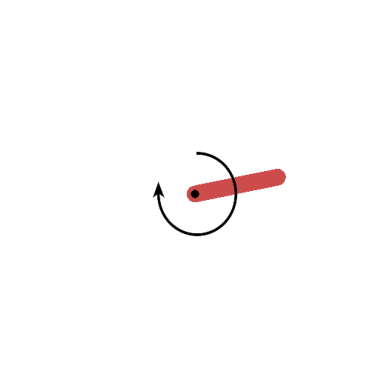

In [2]:
env = gym.make('Pendulum-v0')
print('\nEnvironment : Pendulum-v0')
print('\nObservation Space:', env.observation_space)
print('\nAction Space: ', env.action_space)
print('\nInitial State: ',env.reset())
print('\nA step in the env:', env.step(env.action_space.sample()))
print('\n\nRendered Environment: ')
env.reset()
plt.axis('off')
plt.imshow(env.render(mode='rgb_array'))
env.close()
plt.show()

# Training - Obtain Expert Policy

1. **Initialization:**
   - Use two neural networks: `policy_net` (online) and `target_net`.
   - Utilize a replay memory (`ReplayMemory`) to store experiences.

2. **Experience Replay:**
   - Store transitions (state, action, next state, reward) in the replay memory during interactions.

3. **Sample Batch:**
   - Periodically, sample a random batch of experiences from the replay memory.

4. **Double Q-Learning Update:**
   - Use `policy_net` to select actions for the next states in the sampled batch.
   - Use `target_net` to evaluate Q-values for the selected actions, addressing overestimation.

5. **Compute Loss:**
   - Calculate the loss using Huber loss between predicted Q-values and expected Q-values.
   - Expected Q-values are computed using `target_net` for the next states and considering discounted future rewards.

6. **Optimization:**
   - Minimize the computed loss using an optimizer, updating `policy_net` parameters via backpropagation.
   - Optionally apply gradient clipping for stability.

7. **Update Target Network:**
   - Periodically update `target_net` by copying weights from `policy_net`.

8. **Repeat:**
   - Repeat steps 2-7 over multiple episodes and iterations.

- The Double DQN approach mitigates overestimation bias in traditional Q-learning, improving stability and performance in deep reinforcement learning agents. The policy is represented by the Q-value function learned by the neural network.

In [3]:
dqn_trainer = DDQNTrainer(env, agent='Expert', num_episodes=300, discrete_action_size=9)

print('\nNo. of actions after discretization: ', len(dqn_trainer.action_space))
print('\nAction Space: ', dqn_trainer.action_space.values())


No. of actions after discretization:  9

Action Space:  dict_values([[-2.0], [-1.5], [-1.0], [-0.5], [0.0], [0.5], [1.0], [1.5], [2.0]])


Training..: 100%|█████████████████████████████| 300/300 [02:21<00:00,  2.12it/s]


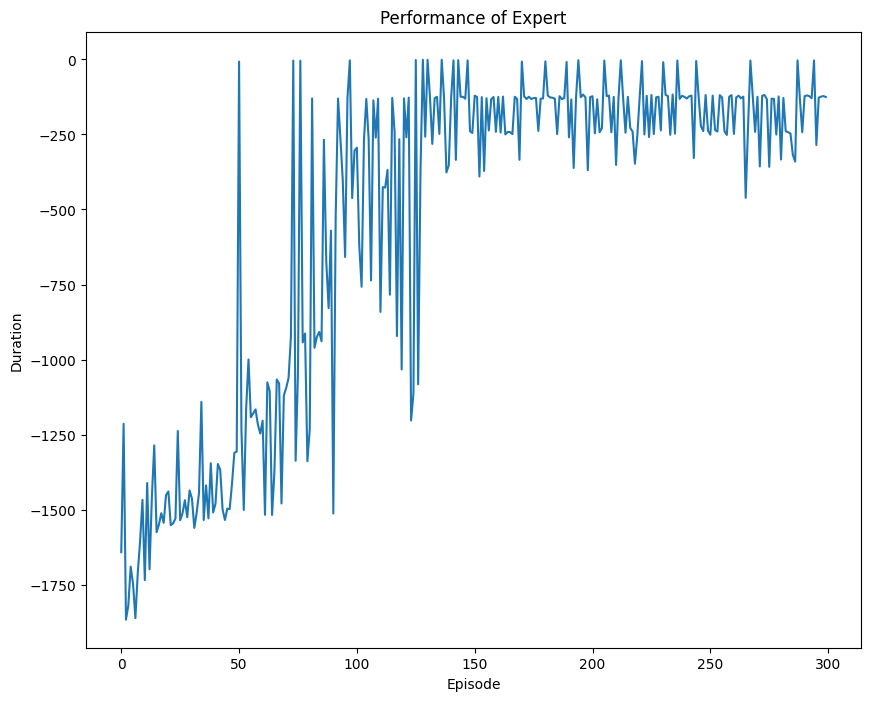

In [4]:
dqn_trainer.dqn_train(plot_save_path='../Results/DQN - Pendulum/Expert Performance.png', 
                      render_save_path='../Results/DQN - Pendulum/Expert_Training')

In [5]:
dqn_trainer.save_trained_model()

Saved  ./data/Expert.pt


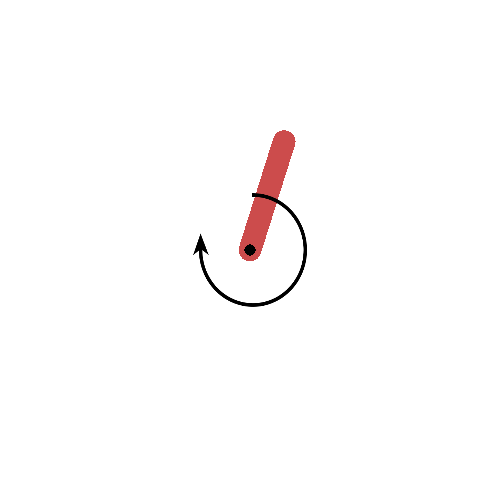

Expert Reward:  -2.0598805244526184


In [6]:
# visualize policy

expert_reward = dqn_trainer.test_model(dqn_trainer.best_model, render_save_path='../Results/DQN - Pendulum/Expert Policy')
print('Expert Reward: ',expert_reward)